<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Felipe Hernández M.
- Nombre de alumno 2: Brandon Peña H.

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/brandonHaipas/MDS7202-Lab-Prog-Ciencia-de-Datos)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [372]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'drive/MyDrive/Beauchef/MDS/Laboratorio de Programación Científica para Ciencia de Datos/Labs/Lab10'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [373]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [374]:
# Carga de datos
import os
path = os.getcwd()
energia_df = pd.read_csv(path + '/energia_homero.csv')
energia_df['date'] = pd.to_datetime(energia_df['date'])
energia_df.head()

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


In [375]:
# Visualización de energia
px.scatter(data_frame=energia_df, x='date', y='Energy_kWh', title='Serie de tiempo de consumo de energía')

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [376]:
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):

        self.init_date = None

    def fit(self, X, y=None):

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

        return self

    def transform(self, X):

        X = X.copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

    def fit_transform(self, X, y=None):

        X = X.copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

In [377]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# 0. División en conjuntos de entrenamiento y prueba
energia_df['set'] = np.where(energia_df.date >= pd.Timestamp('2020-03-01'), 'Test', 'Train')
train_df = energia_df[energia_df['set'] == 'Train'].copy()
test_df = energia_df[energia_df['set'] == 'Test'].copy()

X_train = train_df.drop(columns = ['set'])
y_train = train_df['Energy_kWh'].copy()

X_test = test_df.drop(columns = ['set'])
y_test = test_df['Energy_kWh'].copy()

# 1. Pipeline para obtener tendencia
pipeline_trend = Pipeline([
    ('time_features', TimeTransformer()),
    ('ols', LinearRegression())
])

pipeline_trend.fit(X_train, y_train)
train_pred = pipeline_trend.predict(X_train)
test_pred = pipeline_trend.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

In [378]:
fig = px.scatter(energia_df, x=energia_df.date, y='Energy_kWh', title='Forecast de Temperaturas', color='set')
fig.add_scatter(x=energia_df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

In [379]:
from sklearn.metrics import mean_absolute_error

# 2. Cálculo de MAE y gráfico de predicciones
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 10.57
MAE Test: 8.66


In [380]:
# 3. Gráfico de errores
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

px.line(x = energia_df.date, y=error, title='Error en la predicción', color = energia_df.set)

Si hay un comportamiento estacional, pues se observa que el error oscila anualmente, obtieniendo sus puntos más bajos en el mes de enero y los más altos en julio.

In [381]:
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, n = 4, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):

        '''
        Realiza el fit sobre los datos --> guarda la fecha de inicio de entrenamiento.
        '''

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

    def transform(self, X):

        '''
        Realiza el transform sobre el conjunto X, retornando los términos de fourier.
        '''

        X = X[['date']].copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.index[-1] # last date of X
        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):

        '''
        implementa el método fit y transform a la vez.
        '''

        X = X[['date']].copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):

        '''
        Obtiene los términos de fourier de una serie
        '''

        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index) # este paso es opcional

        return fourier

Se usará un valor de P = 365 que corresponde a la cantidad de días en un año y observamos que la estacionalidad es anual, además usamos n=5 según las recomendaciones de la clase.

In [382]:
# 4. Pipeline para modelar estacionalidad
pipeline_seasonal = Pipeline([
    ('time_features', TimeTransformer(n = 5, p = 365)),
    ('ols', LinearRegression())
])

# 5. Entrenamiento
pipeline_seasonal.fit(X_train, y_train)
train_pred = pipeline_seasonal.predict(X_train)
test_pred = pipeline_seasonal.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

In [383]:
fig = px.scatter(energia_df, x=energia_df.date, y='Energy_kWh', title='Forecast de Temperaturas', color='set')
fig.add_scatter(x=energia_df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

In [384]:
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 5.34
MAE Test: 4.48


In [385]:
# calculamos errores de train y test
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x=energia_df.date, y=error, title='Error en la predicción', color = energia_df.set)
fig.show()

A diferencia del pipeline anterior, ahora el error ya no muestra estacionalidad si no más bien un ruido que lo hace desviarse de 0. Esto tiene sentido ya que la predicción obtenida se ajusta mejor a la estacionalidad de la serie de consumo energético.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [386]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [387]:
# Renombrado de variables
prophet_train_df = train_df.copy().drop(columns='set')
prophet_test_df = test_df.copy().drop(columns='set')
prophet_train_df.columns = ['ds', 'y']
prophet_test_df.columns = ['ds', 'y']

# Ajuste
m = Prophet()
m.fit(prophet_train_df)

# Predicciones
forecast = m.predict(prophet_test_df.drop(columns='y'))
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,18.604827,1.650160,19.234921,18.604827,18.604827,-8.130827,-8.130827,-8.130827,1.682788,1.682788,1.682788,-9.813616,-9.813616,-9.813616,0.0,0.0,0.0,10.474000
1,2020-03-02,18.597851,-0.753395,17.751634,18.597851,18.597851,-10.334003,-10.334003,-10.334003,-0.335083,-0.335083,-0.335083,-9.998920,-9.998920,-9.998920,0.0,0.0,0.0,8.263848
2,2020-03-03,18.590875,-1.623002,16.629577,18.590875,18.590875,-10.964294,-10.964294,-10.964294,-0.799295,-0.799295,-0.799295,-10.164999,-10.164999,-10.164999,0.0,0.0,0.0,7.626581
3,2020-03-04,18.583900,-0.880708,17.020959,18.583900,18.583900,-10.836596,-10.836596,-10.836596,-0.531118,-0.531118,-0.531118,-10.305478,-10.305478,-10.305478,0.0,0.0,0.0,7.747304
4,2020-03-05,18.576924,-0.867742,16.699600,18.576924,18.576924,-10.841049,-10.841049,-10.841049,-0.426451,-0.426451,-0.426451,-10.414599,-10.414599,-10.414599,0.0,0.0,0.0,7.735874


In [388]:
plot_plotly(m, forecast)

In [389]:
plot_components_plotly(m, forecast)

In [390]:
forecast_train = m.predict(prophet_train_df.drop(columns='y'))

mae_train = mean_absolute_error(y_pred=forecast_train['yhat'], y_true=prophet_train_df['y'])
mae_test = mean_absolute_error(y_pred=forecast['yhat'], y_true=prophet_test_df['y'])

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 4.82
MAE Test: 4.92


In [391]:
# calculamos errores de train y test
error_train = y_train.to_numpy() - forecast_train['yhat'].to_numpy()
error_test = y_test.to_numpy() - forecast['yhat'].to_numpy()
error = np.concatenate([error_train, error_test])

# graficamos errores
fig = px.line(x=energia_df.date, y=error, title='Error en la predicción', color = energia_df.set)
fig.show()

La serie no tiene un comportamiento estacional, sino más bien tiene un comportamiento similar al segundo pipeline de la parte anterior.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [392]:
# Carga de datos
frink_df = pd.read_csv(path + '/datos_frink.csv')
frink_df['date'] = pd.to_datetime(frink_df['date'])

# Merge con datos de entrenamiento y prueba
prophet_train_df = train_df.merge(frink_df, on='date')
prophet_test_df = test_df.merge(frink_df, on='date')

prophet_train_df = prophet_train_df.drop(columns='set').rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
prophet_test_df = prophet_test_df.drop(columns='set').rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# Ajuste
regressors = ['Temp_max', 'Temp_avg', 'Temp_min',
       'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min',
       'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg',
       'Press_min']

m = Prophet()

for r in regressors:
    m.add_regressor(r)
m.fit(prophet_train_df)

# Predicciones
forecast = m.predict(prophet_test_df.drop(columns='y'))
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Dew_avg,Dew_avg_lower,Dew_avg_upper,Dew_max,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,18.450078,4.101679,20.872598,18.450078,18.450078,-1.551616,-1.551616,-1.551616,0.361366,...,1.739364,1.739364,1.739364,-7.026447,-7.026447,-7.026447,0.0,0.0,0.0,12.207458
1,2020-03-02,18.441405,1.306888,18.173464,18.441405,18.441405,2.409074,2.409074,2.409074,0.002880,...,-0.393893,-0.393893,-0.393893,-7.319205,-7.319205,-7.319205,0.0,0.0,0.0,9.710557
2,2020-03-03,18.432731,1.452347,18.399539,18.432731,18.432731,4.521442,4.521442,4.521442,-0.236110,...,-0.907312,-0.907312,-0.907312,-7.603519,-7.603519,-7.603519,0.0,0.0,0.0,9.595981
3,2020-03-04,18.424057,-0.827351,16.159811,18.424057,18.424057,1.440906,1.440906,1.440906,-0.594595,...,-0.316470,-0.316470,-0.316470,-7.871927,-7.871927,-7.871927,0.0,0.0,0.0,7.755244
4,2020-03-05,18.415383,1.616756,18.203012,18.415383,18.415383,-14.929947,-14.929947,-14.929947,2.034298,...,-0.445973,-0.445973,-0.445973,-8.117357,-8.117357,-8.117357,0.0,0.0,0.0,10.264368


In [393]:
plot_plotly(m, forecast)

In [394]:
plot_components_plotly(m, forecast)

In [395]:
forecast_train = m.predict(prophet_train_df.drop(columns='y'))

mae_train = mean_absolute_error(y_pred=forecast_train['yhat'], y_true=prophet_train_df['y'])
mae_test = mean_absolute_error(y_pred=forecast['yhat'], y_true=prophet_test_df['y'])

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 4.67
MAE Test: 4.50


El incluir los regresores disminuye el MAE obtenido respecto al modelo prophet obtenido anteriormente.

In [396]:
# calculamos errores de train y test
error_train = y_train.to_numpy() - forecast_train['yhat'].to_numpy()
error_test = y_test.to_numpy() - forecast['yhat'].to_numpy()
error = np.concatenate([error_train, error_test])

# graficamos errores
fig = px.line(x=energia_df.date, y=error, title='Error en la predicción', color = energia_df.set)
fig.show()

No se observa un comportamiento estacional, y al obtener un MAE menor, pareciera que estos regresores aportan información de valor al modelo por lo que explican el fenómeno de consumo energético de Homero.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

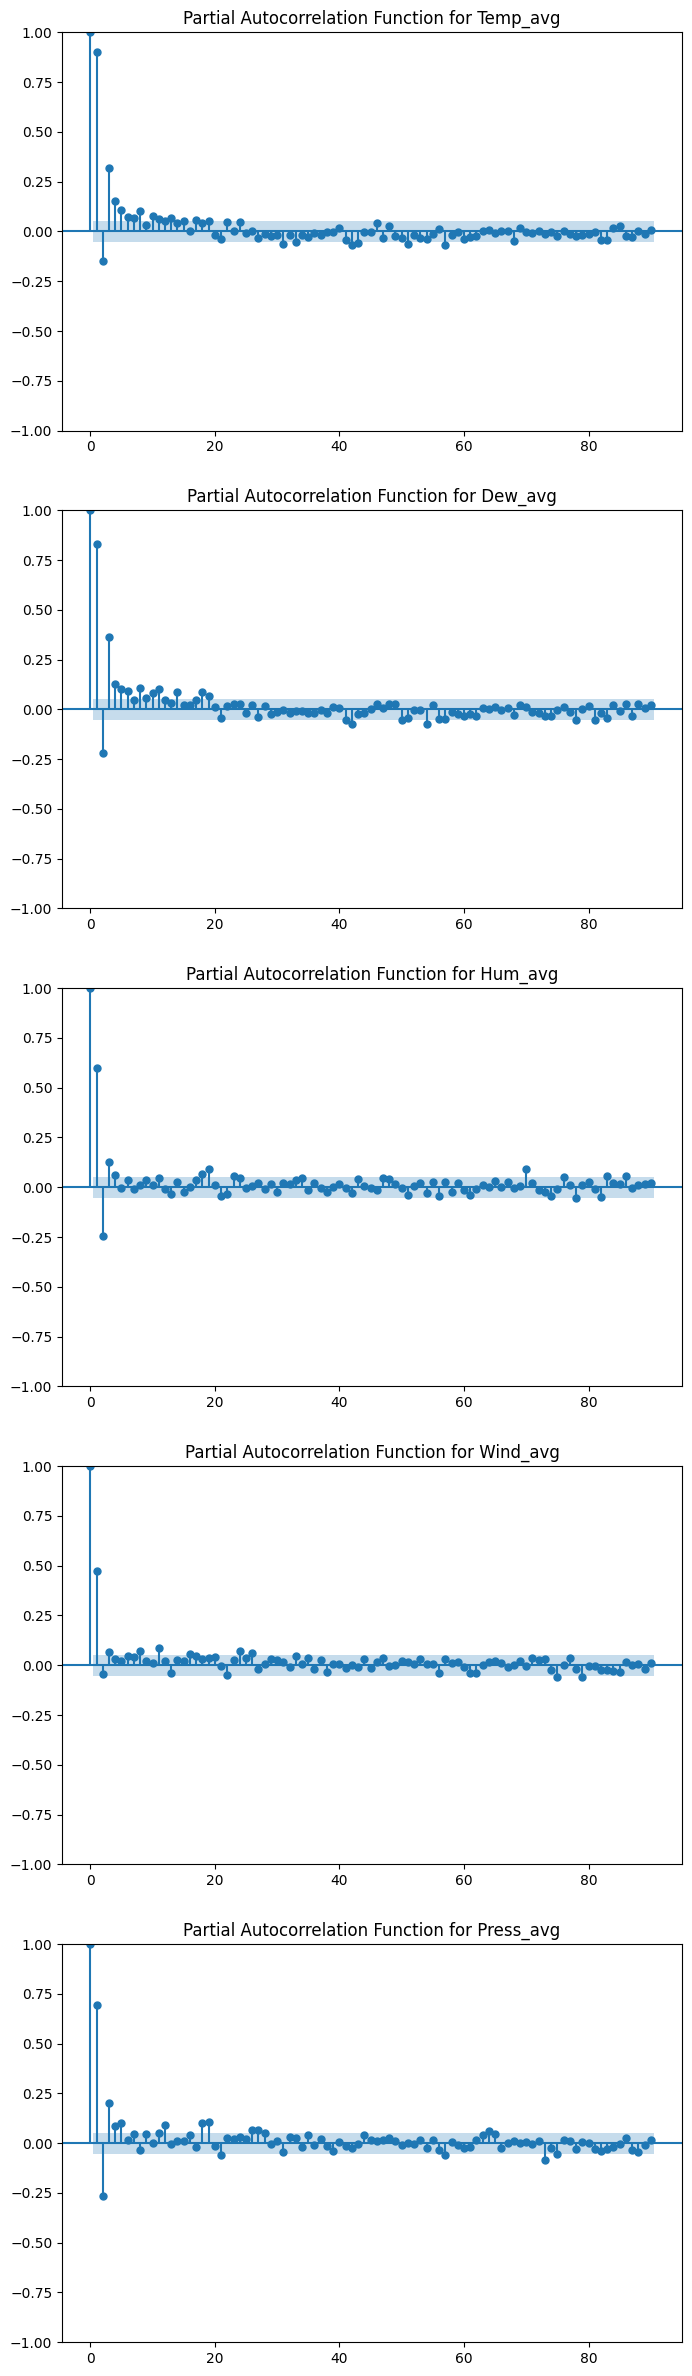

In [397]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(8, 30))
i = 0
for r in regressors:
    if 'avg' in r:
        plot_pacf(prophet_train_df[r], lags=90, alpha = 0.05, ax = axes[i]) # 5% de significancia
        axes[i].set_title('Partial Autocorrelation Function for ' + r)
        i += 1
plt.show()

Observando los gráficos todas las variables tienen una gran autocorrelación parcial del primer lag, por lo que se decide utilizar un lag igual a 1.

In [398]:
def get_lags(X):

    '''
    Retorna variables temporales basadas en lags.
    '''

    avg_features = ['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']
    for f in avg_features:
        X[f + '_lag'] = X[f].shift(1) # lag 1 de la serie

    return X

# Agregamos los lags
prophet_train_lag_df = get_lags(prophet_train_df)
prophet_test_lag_df = get_lags(prophet_test_df)

# Imputamos los valores nulos
prophet_train_lag_df = prophet_train_lag_df.fillna(prophet_train_lag_df.mean())
prophet_test_lag_df = prophet_test_lag_df.fillna(prophet_test_lag_df.mean())

In [399]:
# Ajuste
regressors = ['Temp_max', 'Temp_avg', 'Temp_min',
              'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min',
              'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg', 'Press_min',
              'Temp_avg_lag', 'Dew_avg_lag', 'Hum_avg_lag', 'Wind_avg_lag', 'Press_avg_lag']

m = Prophet()

for r in regressors:
    m.add_regressor(r)
m.fit(prophet_train_lag_df)

# Predicciones
forecast = m.predict(prophet_test_lag_df.drop(columns='y'))
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Dew_avg,Dew_avg_lower,Dew_avg_upper,Dew_avg_lag,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,18.374958,5.082594,21.788851,18.374958,18.374958,-1.452650,-1.452650,-1.452650,0.644187,...,1.679457,1.679457,1.679457,-6.478143,-6.478143,-6.478143,0.0,0.0,0.0,13.748113
1,2020-03-02,18.365878,1.604959,18.684959,18.365878,18.365878,2.255417,2.255417,2.255417,-0.374636,...,-0.355818,-0.355818,-0.355818,-6.789071,-6.789071,-6.789071,0.0,0.0,0.0,9.948950
2,2020-03-03,18.356797,1.309008,18.430380,18.356797,18.356797,4.233053,4.233053,4.233053,0.574793,...,-0.905806,-0.905806,-0.905806,-7.094624,-7.094624,-7.094624,0.0,0.0,0.0,10.098204
3,2020-03-04,18.347717,-0.248980,16.453159,18.347717,18.347717,1.349001,1.349001,1.349001,1.081155,...,-0.310806,-0.310806,-0.310806,-7.387107,-7.387107,-7.387107,0.0,0.0,0.0,8.557384
4,2020-03-05,18.338636,1.187297,17.690903,18.338636,18.338636,-13.977675,-13.977675,-13.977675,0.342710,...,-0.410526,-0.410526,-0.410526,-7.659149,-7.659149,-7.659149,0.0,0.0,0.0,9.517589


In [400]:
plot_plotly(m, forecast)

In [401]:
plot_components_plotly(m, forecast)

In [402]:
forecast_train = m.predict(prophet_train_lag_df.drop(columns='y'))

mae_train = mean_absolute_error(y_pred=forecast_train['yhat'], y_true=prophet_train_lag_df['y'])
mae_test = mean_absolute_error(y_pred=forecast['yhat'], y_true=prophet_test_lag_df['y'])

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 4.61
MAE Test: 4.44


Al incorporar las variables de lag el modelo obtiene los menores MAE observados hasta el momento. Por lo tanto corresponde al mejor modelo gracias al agregar esta información.

In [403]:
# calculamos errores de train y test
error_train = y_train.to_numpy() - forecast_train['yhat'].to_numpy()
error_test = y_test.to_numpy() - forecast['yhat'].to_numpy()
error = np.concatenate([error_train, error_test])

# graficamos errores
fig = px.line(x=energia_df.date, y=error, title='Error en la predicción', color = energia_df.set)
fig.show()

Nuevamente la serie de error no demuestra una estacionalidad evidente, si no más bien ruido que se desvía del 0.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [404]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [405]:
# Grilla de hiperparametros
param_grid = {
    'changepoint_prior_scale': np.logspace(-2, 0, 4).tolist(),
    'seasonality_prior_scale': np.logspace(-1, 1, 4).tolist(),
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': np.linspace(0.8, 0.95, 4).tolist()
}

tuning_results, best_params = optimize_prophet(prophet_train_lag_df, prophet_test_lag_df, regressors, param_grid)

Tuning Prophet parameters: 100%|██████████| 128/128 [00:47<00:00,  2.69it/s]


In [406]:
# Modelo ajustado con los mejores hiperparámetros
m = Prophet(**best_params)

for r in regressors:
    m.add_regressor(r)
m.fit(prophet_train_lag_df)

# Predicciones
forecast = m.predict(prophet_test_lag_df.drop(columns='y'))
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Dew_avg,Dew_avg_lower,Dew_avg_upper,Dew_avg_lag,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,19.537812,7.227086,23.036452,19.537812,19.537812,-1.532981,-1.532981,-1.532981,0.911427,...,1.672527,1.672527,1.672527,-6.498466,-6.498466,-6.498466,0.0,0.0,0.0,15.111302
1,2020-03-02,19.536930,3.872176,19.192957,19.536930,19.536930,2.380141,2.380141,2.380141,-0.530053,...,-0.361036,-0.361036,-0.361036,-6.795810,-6.795810,-6.795810,0.0,0.0,0.0,11.483912
2,2020-03-03,19.536048,4.078838,19.348501,19.536048,19.536048,4.467139,4.467139,4.467139,0.813245,...,-0.907639,-0.907639,-0.907639,-7.087194,-7.087194,-7.087194,0.0,0.0,0.0,11.662675
3,2020-03-04,19.535166,1.841157,17.701424,19.535166,19.535166,1.423600,1.423600,1.423600,1.529671,...,-0.305461,-0.305461,-0.305461,-7.365060,-7.365060,-7.365060,0.0,0.0,0.0,10.027975
4,2020-03-05,19.534285,2.930509,18.582506,19.534285,19.534285,-14.750635,-14.750635,-14.750635,0.484883,...,-0.370616,-0.370616,-0.370616,-7.622209,-7.622209,-7.622209,0.0,0.0,0.0,10.878342


In [407]:
plot_plotly(m, forecast)

In [408]:
plot_components_plotly(m, forecast)

In [409]:
forecast_train = m.predict(prophet_train_lag_df.drop(columns='y'))

mae_train = mean_absolute_error(y_pred=forecast_train['yhat'], y_true=prophet_train_lag_df['y'])
mae_test = mean_absolute_error(y_pred=forecast['yhat'], y_true=prophet_test_lag_df['y'])

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 4.40
MAE Test: 3.98


In [410]:
# calculamos errores de train y test
error_train = y_train.to_numpy() - forecast_train['yhat'].to_numpy()
error_test = y_test.to_numpy() - forecast['yhat'].to_numpy()
error = np.concatenate([error_train, error_test])

# graficamos errores
fig = px.line(x=energia_df.date, y=error, title='Error en la predicción', color = energia_df.set)
fig.show()

Nuevamente no se aprecia estacionalidad pero el ruido parece ser más controlado. Esto es concordante con el MAE calculado dado que corresponde a los más bajos de este trabajo, por lo que este último modelo es el mejor para el forecasting del consumo energético de Homero.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [411]:
!pip install surprise

In [412]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [413]:
#CODIGO AQUI

duff_df = pd.read_csv(path + "/cervezas.csv")
duff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295059 entries, 0 to 295058
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     295059 non-null  int64  
 1   beerId     295059 non-null  int64  
 2   rating     295059 non-null  float64
 3   beerName   295059 non-null  object 
 4   beerStyle  295059 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.3+ MB


In [414]:
duff_df.head()

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA


In [415]:
# Número de cervezas evaluadas
len(duff_df['beerId'].value_counts().index)

3747

In [416]:
# Número de participantes únicos de esta encuesta
len(duff_df['userId'].value_counts().index)

706

In [417]:
duff_df['rating'].value_counts()

rating
4.0    110262
4.5     64250
3.5     53717
3.0     28363
5.0     18939
2.5      9541
2.0      6228
1.5      2004
1.0      1755
Name: count, dtype: int64

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [418]:
usuarios = len(duff_df['userId'].value_counts().index)
cervezas = len(duff_df['beerId'].value_counts().index)
calificaciones = len(duff_df)

print(f"Hay un total de {usuarios} usuarios distintos en los datos")
print(f"Hay un total de {cervezas} cervezas distintas en los datos")
print(f"Hay un total de {calificaciones} calificaciones distintas en los datos, que corresponden al largo del dataframe")
print(f"faltan {306*3747 - calificaciones} calificaciones en el dataframe")

Hay un total de 706 usuarios distintos en los datos
Hay un total de 3747 cervezas distintas en los datos
Hay un total de 295059 calificaciones distintas en los datos, que corresponden al largo del dataframe
faltan 851523 calificaciones en el dataframe


In [419]:
total_mean = duff_df.describe()['rating'].loc['mean']

print(f"El promedio de ratings total es: {total_mean:.2f}")

El promedio de ratings total es: 3.86


In [420]:

# agrupar por beerId, despues hacer una funcion de agregacion por media
grouped_duff_mean = duff_df.groupby('beerId')['rating'].mean().reset_index()
grouped_duff_mean.head()

fig = px.histogram(grouped_duff_mean, x= 'rating', title="Mean rating distribution for beers")
fig.show()

La media de ratings de los productos distribuye como una distribución beta con un skewness hacia la derecha.

In [421]:
from surprise import Reader, Dataset

reader = Reader(rating_scale = (0, 5)) # instanciamos reader, es importante definir la escala de los valores (ratings)

df_collaborative = duff_df[['userId', 'beerId', 'rating']].copy() # ordenamos dataset en user, beer, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise

from surprise.model_selection import train_test_split

trainset = dataset.build_full_trainset()

def get_user_item_matrix(dataset):
    users = trainset.all_users()
    items = trainset.all_items()

    user_ids = [trainset.to_raw_uid(u) for u in users]
    item_ids = [trainset.to_raw_iid(i) for i in items]

    user_item_matrix = pd.DataFrame(index=user_ids, columns=item_ids)

    for u in users:
        for i, r in trainset.ur[u]:
            user = trainset.to_raw_uid(u)
            item = trainset.to_raw_iid(i)
            user_item_matrix.loc[user, item] = r

    
    user_item_matrix = user_item_matrix.fillna(0)  
    return user_item_matrix

In [422]:
user_item_matrix = get_user_item_matrix(trainset)
user_item_matrix

/tmp/ipykernel_19589/3698023278.py:28: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,995,58695,4083,40310,1904,409,16858,25061,14309,13906,...,1145,708,45308,25095,4957,47589,62792,18432,4753,6428
144,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4261,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [423]:
#CODIGO AQUI

# 1
beer_only_df = duff_df[['beerId', 'beerName', 'beerStyle']].copy().drop_duplicates().reset_index(drop=True)
beer_only_df.head()

,beerId,beerName,beerStyle
0,995,Mai Bock,Maibock / Helles Bock
1,58695,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,4083,Stone Ruination IPA,American Double / Imperial IPA
3,40310,Noël Des Géants,Herbed / Spiced Beer
4,1904,Sierra Nevada Celebration Ale,American IPA


In [424]:
#2
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase = True, # transformación a minúsculas
                             min_df = 10, # mínimo 10 ocurrencias
                             stop_words = 'english') # eliminar stopwords
bow = vectorizer.fit_transform(beer_only_df['beerStyle']).toarray() # Vectorizamos texto
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out()) # Transformamos a Dataframe
bow

,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3743,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3744,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [425]:
# importamos cosine_similarity de sklearn
from sklearn.metrics.pairwise import cosine_similarity

# calculamos la similitud coseno de cada vector generado contra el resto
cosine_sim = cosine_similarity(bow, bow)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.28867513, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.28867513, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [426]:
def get_recommendations(df, beer, k = 5):

  """
  Returns the top k similar beers using BoW
  """

  # Assert beer is contained in dataset
  assert beer in df['beerName'].values, 'beer is not contained in train dataset!'

  # Get idx of beer
  idx = df[df['beerName'] == beer].index[0]

  # Get pairwise similarities of all beers with specified beer
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Sort the beers based on the similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Get the scores of the k most similar beers
  sim_scores = sim_scores[1:k+1]

  # Get the beer indices
  beer_indices = [i[0] for i in sim_scores]

  # Return the top k most similar beers
  return df['beerName'].iloc[beer_indices].values

get_recommendations(df = beer_only_df, beer = 'Chocolate Porter')

array(['Great Lakes Edmund Fitzgerald Porter', 'Perseus Porter',
       'Southampton Imperial Porter',
       'Kona Coffee Macadamia Coconut Porter', 'Black Marlin Porter'],
      dtype=object)

In [427]:
# primero rescatamos la película más vista por el usuario
userId = 100 # usuario a recomendar
user_beers = duff_df[duff_df['userId'] == userId].sort_values('rating', ascending = False) # películas rateadas por el usuario
best_beer = user_beers.iloc[0]['beerName'] # película con mejor rating
print(f'most liked beer by user {userId}: {best_beer}')

most liked beer by user 100: McNeill's Firehouse Amber Ale


In [428]:
# finalmente, printeamos las k mejores recomendaciones para el usuario
get_recommendations(df = beer_only_df, beer = best_beer)

array(['Grail Ale', "Santa's Private Reserve Ale",
       'Hemp Hop Rye Amber Ale', 'Autumn Fest', 'Red Rocket Ale'],
      dtype=object)

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [429]:
#CODIGO AQUI
from surprise import Reader, Dataset

reader = Reader(rating_scale = (0, 5)) # instanciamos reader, es importante definir la escala de los valores (ratings)

df_collaborative = duff_df[['userId', 'beerId', 'rating']].copy() # ordenamos dataset en user, beer, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise
dataset


Efectivamente importa el orden, puesto que la primera columna queda como el user id (uid), la segunda como el Item id (iid) y la tercera como el rating (r_ui) al momento de hacer las predicciones como se verá más adelante.

In [430]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data = dataset, test_size = 0.3, random_state = 3380)
testset[:10]

[(651, 52043, 3.5),
 (10099, 6260, 5.0),
 (140, 37477, 4.5),
 (148, 25989, 5.0),
 (1837, 5245, 4.0),
 (610, 3158, 4.5),
 (39, 133, 4.5),
 (112, 1867, 5.0),
 (35, 60064, 2.5),
 (42, 25005, 4.0)]

In [431]:
from surprise.prediction_algorithms import KNNBasic

sim_options_user = {
    "name": "cosine",
    "user_based": True,  # compute  similarities between users
}

knn_user_algo = KNNBasic(sim_options=sim_options_user)

knn_user_algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [432]:
predictions = knn_user_algo.test(testset)
df_predictions = pd.DataFrame(predictions)
df_predictions.drop(columns = ['details'])

,uid,iid,r_ui,est
0,651,52043,3.5,3.807692
1,10099,6260,5.0,3.850000
2,140,37477,4.5,4.112500
3,148,25989,5.0,3.837500
4,1837,5245,4.0,3.966667
...,...,...,...,...
88513,651,6076,4.5,4.250000
88514,143,1352,3.0,3.212500
88515,863,22790,4.5,4.412500
88516,12985,47941,4.0,3.825000


In [433]:
from surprise.accuracy import mae
mae(predictions)

MAE:  0.4652


0.46520802143256357

In [434]:
sim_options_beer = {
    "name": "cosine",
    "user_based": False, # compute similarities between items
}
knn_beer_algo = KNNBasic(sim_options=sim_options_beer)

knn_beer_algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [435]:
predictions = knn_beer_algo.test(testset)
df_predictions = pd.DataFrame(predictions)
df_predictions.drop(columns = ['details'])

,uid,iid,r_ui,est
0,651,52043,3.5,4.209859
1,10099,6260,5.0,3.850000
2,140,37477,4.5,4.112500
3,148,25989,5.0,3.837500
4,1837,5245,4.0,3.912769
...,...,...,...,...
88513,651,6076,4.5,4.250000
88514,143,1352,3.0,3.212500
88515,863,22790,4.5,4.412500
88516,12985,47941,4.0,3.825000


In [436]:
mae(predictions)

MAE:  0.4652


0.46523121163672004

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [437]:
#CODIGO AQUI

from surprise import NMF

model1 = NMF(random_state = 3380) # instanciamos modelo NMF (cambiar a modelo de preferencia)
model1.fit(trainset) # fit del modelo
predictions1 = model1.test(testset) # retorna un dataframe con el rating estimado para cada (user_id, item_id)
df_predictions = pd.DataFrame(predictions1)
df_predictions.drop(columns = ['details'])


,uid,iid,r_ui,est
0,651,52043,3.5,3.705730
1,10099,6260,5.0,3.919372
2,140,37477,4.5,3.968601
3,148,25989,5.0,3.694468
4,1837,5245,4.0,4.005753
...,...,...,...,...
88513,651,6076,4.5,4.070604
88514,143,1352,3.0,3.314464
88515,863,22790,4.5,4.372749
88516,12985,47941,4.0,3.982615


In [438]:
mae(predictions)

MAE:  0.4652


0.46523121163672004

In [439]:
from surprise import SVD

model2 = SVD(random_state = 3380) # instanciamos modelo SVD (cambiar a modelo de preferencia)
model2.fit(trainset) # fit del modelo
predictions2 = model2.test(testset) # retorna un dataframe con el rating estimado para cada (user_id, item_id)
df_predictions = pd.DataFrame(predictions2)
df_predictions.drop(columns = ['details'])


,uid,iid,r_ui,est
0,651,52043,3.5,3.828563
1,10099,6260,5.0,3.846123
2,140,37477,4.5,4.103933
3,148,25989,5.0,3.884248
4,1837,5245,4.0,3.951498
...,...,...,...,...
88513,651,6076,4.5,4.169155
88514,143,1352,3.0,3.235534
88515,863,22790,4.5,4.327937
88516,12985,47941,4.0,3.797389


In [440]:
mae(predictions)

MAE:  0.4652


0.46523121163672004

El mejor es SVD porque tiene mejor MAE.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [441]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

In [442]:
len(predictions)

88518

**Respuesta:**

In [443]:
#Desarrolle su código aquí

from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if (iid,est) not in top_n[uid]:
            top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

get_top_n(predictions, n = 3)[100]

[(325, 3.863497875150845), (1393, 3.75137523742278), (1814, 3.750347642550377)]

In [444]:
import random as rnd
rnd.seed(3380)
full_trainset = dataset.build_full_trainset() # primero separamos los (usuario, producto) con ratings
missing_ratings = full_trainset.build_anti_testset() # luego obtenemos los valores sin ratings
missing_ratings[:10]
carls_missing = [(a,b,c) for (a,b,c) in missing_ratings if a == 100]
rand_ratings = rnd.choices(carls_missing, k=5)
rand_ratings

predictions = model2.test(rand_ratings)
pred_df = pd.DataFrame(predictions).drop(columns=['details'])
pred_df

,uid,iid,r_ui,est
0,100,33515,3.860367,3.765276
1,100,46188,3.860367,3.892988
2,100,39477,3.860367,3.618899
3,100,1079,3.860367,3.823978
4,100,58873,3.860367,3.847817


In [445]:
precision, recall = precision_recall_at_k(predictions2, k=10, threshold=3.5)

prec_mean = np.mean(list(precision.values()))
rec_mean = np.mean(list(recall.values()))

print(f"promedio simple de precision para SVD: {prec_mean:.2f}")
print(f"promedio simple de recall SVD: {rec_mean:.2f}")

promedio simple de precision para SVD: 0.75
promedio simple de recall SVD: 0.34


Podemos decir que el valor de precision obtenido es importante, sin embargo su valor de recall es bajo, por lo tanto está recomendando pocos items relevantes de los disponibles, luego podría ser un mejor modelo.

In [446]:
k_list = list(range(3,26))
measure_dict = {"k":[],"measure":[], "type":[]}

for k in k_list:
    precision, recall = precision_recall_at_k(predictions =predictions2, k=k)
    measure_dict['measure'].append( np.mean(list(precision.values())))
    measure_dict['measure'].append(np.mean(list(recall.values())))
    measure_dict['type'] += ['precision', 'recall']
    measure_dict['k'] +=[k,k]


measure_df = pd.DataFrame(measure_dict)

fig = px.line(data_frame=measure_df, x="k", y="measure", color='type')
fig.show()

Se puede observar que a medida aumenta el valor de k, aumenta el recall. Esto tiene sentido porque el numerador de la métrica de recall puede aumentar pero su denominador no. Por otro lado el valor de precision se mantiene casi constante, puesto que tanto su numerador como denominador pueden crecer con k.

In [447]:
threshold_list = np.arange(start=3.0, stop=4.6, step=0.1)
measure_dict = {"threshold":[],"measure":[], "type":[]}

for t in threshold_list:
    precision, recall = precision_recall_at_k(predictions =predictions2, threshold= t)
    measure_dict['measure'].append( np.mean(list(precision.values())))
    measure_dict['measure'].append(np.mean(list(recall.values())))
    measure_dict['type'] += ['precision', 'recall']
    measure_dict['threshold'] +=[t,t]


measure_df = pd.DataFrame(measure_dict)

fig = px.line(data_frame=measure_df, x="threshold", y="measure", color='type')
fig.show()

Precision y recall disminuyen dado que a mayor threshold hay menor cantidad de items relevantes disponibles, por lo que el numerador de ambas métricas disminuye.

In [448]:
missing_predictions = model2.test(missing_ratings)

In [449]:
missing_pred_df = pd.DataFrame(missing_predictions).drop(columns='details')
missing_pred_df.head()

,uid,iid,r_ui,est
0,144,58695,3.860367,3.652977
1,144,4083,3.860367,3.944620
2,144,40310,3.860367,3.748957
3,144,1904,3.860367,3.931639
4,144,409,3.860367,3.757430


In [450]:
cols = {"uid":"userId", "iid":"beerId", "est":"rating"}
missing_pred_df = missing_pred_df.rename(columns=cols)
missing_pred_df = missing_pred_df.drop(columns=['r_ui'])
interaction_df = duff_df[['userId', 'beerId', 'rating']].copy().reset_index(drop=True)
full_i_df = pd.concat([interaction_df, missing_pred_df])


In [451]:
full_i_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2936694 entries, 0 to 2641634
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   beerId  int64  
 2   rating  float64
dtypes: float64(1), int64(2)
memory usage: 89.6 MB


In [452]:
reader = Reader(rating_scale = (0, 5)) 
dataset = Dataset.load_from_df(full_i_df, reader) 
trainset = dataset.build_full_trainset()
user_item_matrix = get_user_item_matrix(trainset)
user_item_matrix

/tmp/ipykernel_19589/3698023278.py:28: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,995,58695,4083,40310,1904,409,16858,25061,14309,13906,...,1145,708,45308,25095,4957,47589,62792,18432,4753,6428
144,2.500000,3.652977,3.944620,3.748957,3.931639,3.757430,3.736833,3.734257,3.587175,3.756716,...,3.815861,3.761710,3.894086,3.775452,3.858966,3.718327,3.660867,3.285407,3.710689,3.621020
63,4.087506,4.000000,4.222397,4.043049,4.264840,4.047113,4.017148,4.047730,3.939011,4.029647,...,3.986701,4.191377,4.115631,4.059535,4.082022,4.053423,3.858095,3.692982,4.070831,3.859657
147,3.944013,3.842319,4.000000,3.883616,4.111869,3.902569,3.852398,3.870583,3.792265,3.879627,...,3.838329,4.010902,3.969732,3.921478,3.948096,3.906537,3.704990,3.549775,3.924454,3.712289
4261,3.859516,3.684126,3.861210,3.500000,3.933910,3.786402,3.699094,3.623727,3.593249,3.669056,...,3.704791,3.871067,3.816441,3.878448,3.769105,3.570569,3.525215,3.450651,3.762102,3.562420
140,3.978543,3.874539,4.101241,3.922440,4.000000,3.952484,3.892895,3.909313,3.832417,3.922333,...,3.879682,4.042317,3.995585,3.953444,3.978761,3.926711,3.747367,3.589412,3.954288,3.746623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3.925248,3.936394,4.066701,3.844883,4.024897,3.836794,3.841443,3.908235,3.732763,3.869606,...,3.689029,4.027444,3.890299,3.913777,3.987332,3.961966,3.638707,3.373317,3.845314,3.738551
892,3.663402,3.821349,3.950263,3.721821,3.991538,3.886437,3.798379,3.819128,3.703332,3.920452,...,3.725989,3.842409,3.857520,3.739290,3.803152,3.954219,3.755653,3.353686,3.670690,3.568060
1879,3.835677,3.992785,4.081981,3.901557,4.097269,4.126116,3.867900,3.892921,3.831991,3.929073,...,3.910017,3.911110,3.833786,4.022072,4.048971,3.825330,3.706809,3.557842,3.826783,3.986476
944,3.701301,3.549097,3.782376,3.786324,3.915074,3.611761,3.712268,3.535389,3.520151,3.649697,...,3.462572,3.730876,3.585007,3.659243,3.568501,3.752248,3.336739,3.245398,3.649661,3.472103


In [453]:
print(f"Cantidad de valores nulos: {pd.isna(user_item_matrix).sum().values.sum()}")

Cantidad de valores nulos: 0


# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
